# Analysis of Why Patients Miss Their Scheduled Medical Appointments

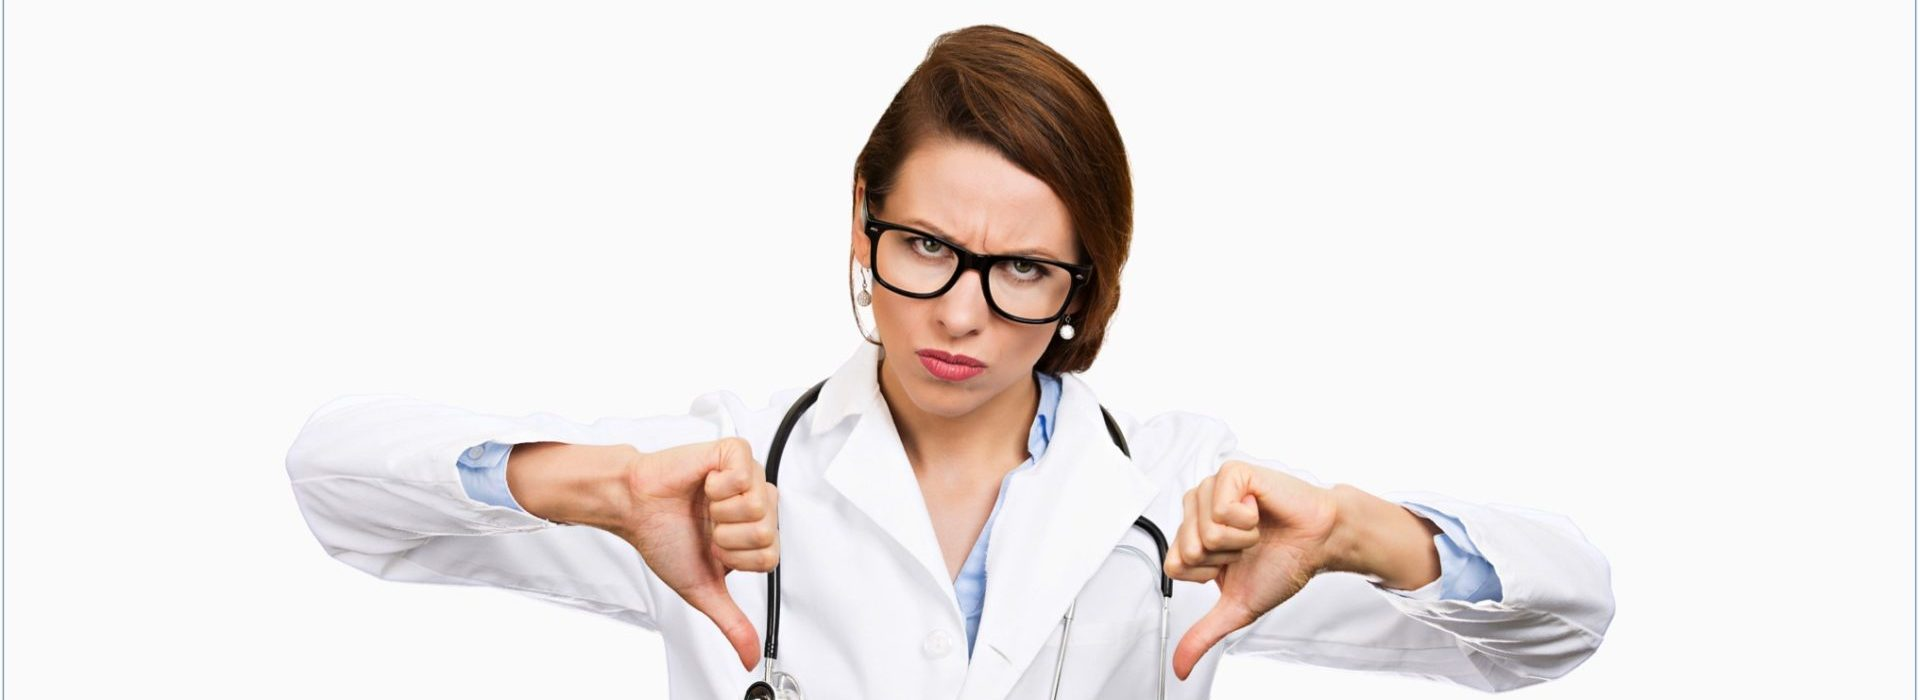

## Reza Ameli, Kevin Do, Richard Do

### CMSC320 Final Tutorial Fall 2019

## Introduction

We live in a busy world where we all have many things to worry about on a daily basis, so it is very easy for us to forget about something planned in our day since medical appointments are made months in advance. Our day to day routines usually just kick in without us even noticing, so when there is something that was planned months ago, it is easy to be lost in the jumble of things that is our daily agenda.

The purpose of this project is to figure out whether there is a way to predict if there was a way to predict if someone were to not show up to a medical appointment. This could prove beneficial, so that medical offices would be able to possibly determine how likely a patient will show up or not depending on certain characteristics derived from the data. As a result, medical offices would be able to remove or reschedule the appointments for those who didn't show up and possibly fit in appointments for patients who they know will show up.

## Working with the Data: Data Curation, Parsing and Management
We first import all the libraries that we need to work with the data which include: [pandas](https://pandas.pydata.org/pandas-docs/stable/), [numpy](https://numpy.org/doc/), [matplotlib](https://matplotlib.org/3.1.1/contents.html), [seaborn](https://seaborn.pydata.org/) and more.

We also installed Google Translate because the data was from Brazil

In [12]:
# Necessary libraries and imports to complete this tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Reading the Data

In [13]:
appts = pd.read_csv("noshowappts.csv", sep=',')
appts.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From the medical appointments dataset we got 14 columns which consisted of:
+ PatientId
+ AppointmentID
+ Gender
+ ScheduledDay (DataMarcacaoSonsulta)
+ AppointmentDay (DataAgendamento)
+ Age
+ Neighbourhood
+ [Scholarship](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
+ Hipertension
+ Diabetes
+ Alcoholism
+ Handcap
+ SMS_received
+ No-show

The columns should all be obvious and the 1s and 0s for certain categories represent true or false values while the only topic that may need an explanation is Scholarship where a link is provided for more information. SMS_Received might be a little unclear but from intuition it is whether the patient sent a SMS to the medical office or not notifying the office if he or she was going to make his or her appointment.

## Tidying and Modifying the Data
We can remove the PatientID, AppointmentID and Neighbourhood columns since we will not be needing the values from that data since they provide no useful information for the purposes of this tutorial.

However, the sections that we do care about the rest of the information within the dataframe. We went ahead and created two more columns in the dataframe to determine which season the appointment was scheduled and which season the appointment was supposed to take place. We did this to see whether patients were more likely to miss an appointment during a certain season.

Finally, we created two new dataframes; the first consisting of only people who are confirmed no-shows and the second only people who did show to their appointment. This will make our EDA simpler. 

In [3]:
#tidying data
appts = appts.drop(columns=['PatientId', 'AppointmentID', 'Neighbourhood'])
sch_datetimes = []
appt_datetimes = []
sch_seasons = [] 
appt_seasons = []

def calc_season(season):
    if season == 1:
        return "Winter"
    elif season == 2:
        return "Spring"
    elif sch_season == 3:
        return "Summer"
    elif season == 4:
        return "Autumn"
    else:
        return "Unknown"

for index, row in appts.iterrows():
    sch_date = datetime.strptime(row['ScheduledDay'], "%Y-%m-%dT%H:%M:%SZ")
    appt_date = datetime.strptime(row['AppointmentDay'], "%Y-%m-%dT%H:%M:%SZ")
    
    sch_month = sch_date.month
    appt_month = appt_date.month
    sch_season = (sch_month%12 + 3)//3
    appt_season = (appt_month%12 + 3)//3
    
    sch_seasons.append(calc_season(sch_season))
    appt_seasons.append(calc_season(appt_season))
    
    sch_datetimes.append(datetime(sch_date.year, sch_date.month, sch_date.day, 
                                  sch_date.hour, sch_date.minute, sch_date.second))
    appt_datetimes.append(datetime(appt_date.year, appt_date.month, appt_date.day, 
                                   appt_date.hour, appt_date.minute, appt_date.second))

appts['ScheduledDay'] = sch_datetimes
appts['AppointmentDay'] = appt_datetimes
appts['ScheduledSeason'] = sch_seasons
appts['AppointmentSeason'] = appt_seasons

group_noshow = dict(tuple(appts.groupby('No-show')))
yes = group_noshow['Yes']
no = group_noshow['No']

appts.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledSeason,AppointmentSeason
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No,Spring,Spring
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No,Spring,Spring
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No,Spring,Spring
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No,Spring,Spring
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No,Spring,Spring


Now that we have all the columns that we want, we can move forward with our EDA!

## Exploratory Data Analysis
Here we wanted to see what kind of correlations we could take out of the data to hopefully figure out if certain health conditions make people more prone to missing a medical appointment. The three most prominent medical conditions that were presented in the dataset include: Hypertension, Diabetes and Alcoholism. We decided to ignore the Handicap column because there was not a sufficient amount of data to make it meaningful for analysis. We wanted to compare whether there were any differences between patients who did and did not show up for their appointments so we plotted plots for both of the groups.

<Figure size 1080x720 with 0 Axes>

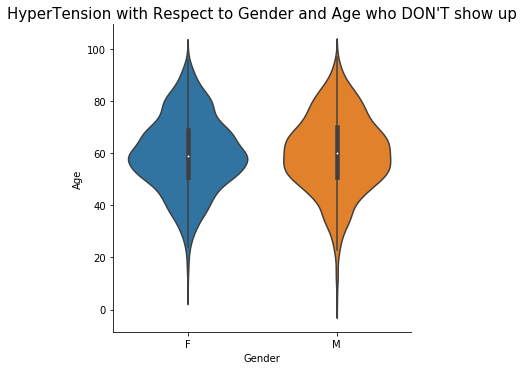

In [4]:
hibloodpressure = yes[yes['Hipertension'] == 1]
fig = plt.figure(figsize=(15,10))
sns.catplot(x='Gender', y='Age', data=hibloodpressure, kind="violin")
plt.title("HyperTension with Respect to Gender and Age who DON'T show up", fontsize=15)
plt.show()

<Figure size 1080x720 with 0 Axes>

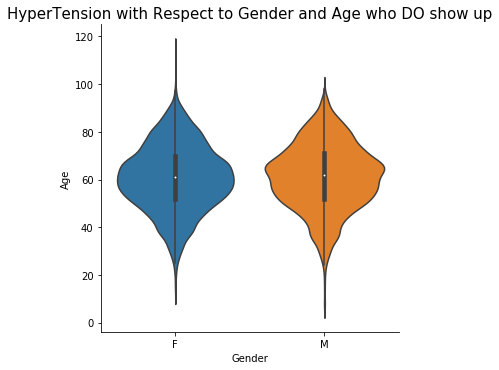

In [5]:
hibloodpressure1 = no[no['Hipertension'] == 1]
fig = plt.figure(figsize=(15,10))
sns.catplot(x='Gender', y='Age', data=hibloodpressure1, kind="violin")
plt.title("HyperTension with Respect to Gender and Age who DO show up", fontsize=15)
plt.show()

The medians between the group who does show up and doesn't show varies by a few years between females and males. However the probability between the two groups varies a bit more slightly with males than females while the peak probability of females missing an appointment is greater than the group of females who do show up. More males who have high blood pressure are more likely to show up to their medical appointments than females are. But there is still a high chance that people with high blood pressure will attend their appointments. While around the probability to either show up or not shot up is still in the 60s range there is not direct correlation we can derive from this plot.

<Figure size 1080x720 with 0 Axes>

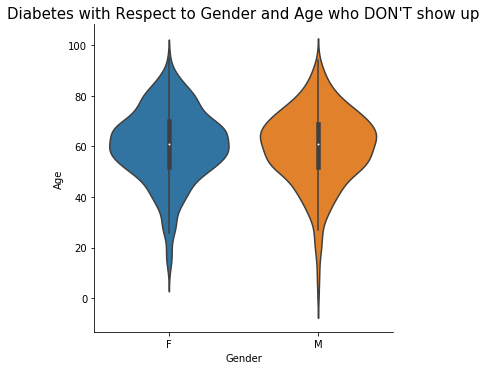

In [6]:
diabetes = yes[yes['Diabetes'] == 1]
fig = plt.figure(figsize=(15,10))
sns.catplot(x='Gender', y='Age', data=diabetes, kind="violin")
plt.title("Diabetes with Respect to Gender and Age who DON'T show up", fontsize=15)
plt.show()

<Figure size 1080x720 with 0 Axes>

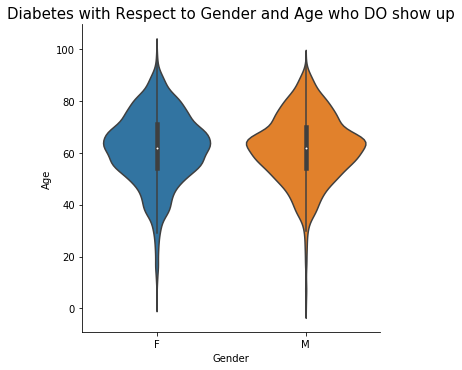

In [7]:
diabetes1 = no[no['Diabetes'] == 1]
fig = plt.figure(figsize=(15,10))
sns.catplot(x='Gender', y='Age', data=diabetes1, kind="violin")
plt.title("Diabetes with Respect to Gender and Age who DO show up", fontsize=15)
plt.show()

The medians patients with diabetes lies around 60 years again but the probability for men and women to attend their appointments are higher when they are older than 60 years old. However, the probability for men and women to miss their appointments are greater when they are younger than 60 years old. This could show that people are not as concerned to attending appointments since they believe that diabetes is not as high of a risk as other health concerns. This is a promising result and we will take this into account in our further analysis. 

<Figure size 1080x720 with 0 Axes>

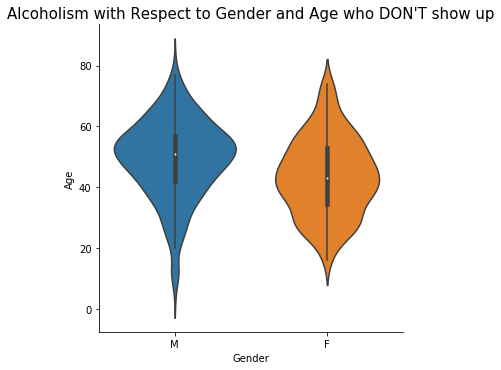

In [8]:
alcoholism = yes[yes['Alcoholism'] == 1]
fig = plt.figure(figsize=(15,10))
sns.catplot(x='Gender', y='Age', data=alcoholism, kind="violin")
plt.title("Alcoholism with Respect to Gender and Age who DON'T show up", fontsize=15)
plt.show()

<Figure size 1080x720 with 0 Axes>

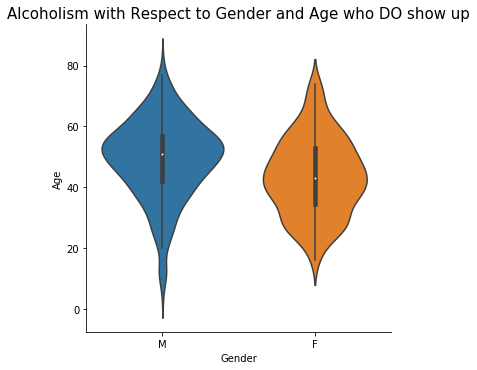

In [9]:
alcoholism1 = no[no['Alcoholism'] == 1]
fig = plt.figure(figsize=(15,10))
sns.catplot(x='Gender', y='Age', data=alcoholism, kind="violin")
plt.title("Alcoholism with Respect to Gender and Age who DO show up", fontsize=15)
plt.show()

This is where it gets a bit interesting because now there's more data for males now when it relates to alcoholism (who would've knew). Anywho, the median age for people who do and do not show up to their appointments drop to a lower age range like 50 for males and 45 for females. However, I do not seen much a change in the two plots since the dataset lacks much variation when it comes to alcoholism. 

The above graphs show us that gender has an impact when determining if someone will not show up to their appointment. This is compounded with the fact that this dataset has a 65%/35% Female to Male split. As we begin to analyze the whole dataset this could cause skew and inconsistency in our results. So, we will need to create a variable to standarize this as we proceed to analyze the whole dataset. The following code creates a column of standardized age values. This is done by first calculating the standard deviation and mean for each age. Then we use the formula ((age - avg_age) / std_dev). Then the column is added to the dataframe.

In [10]:
std_age = appts.groupby('Gender')['Age'].std()
avg_age = appts.groupby('Gender')['Age'].mean()
stdized = []

for index, row in appts.iterrows():
    s = std_age.loc[row['Gender']]
    var = (row['Age'] - avg_age.loc[row['Gender']]) / s 
    stdized.append(var)
appts['std_age'] = stdized
appts.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledSeason,AppointmentSeason,std_age
0,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No,Spring,Spring,1.042914
1,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No,Spring,Spring,0.911109
2,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No,Spring,Spring,1.042914
3,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No,Spring,Spring,-1.394433
4,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No,Spring,Spring,0.772098


Now we want to analyze SMS_received using our standarized variable. This will allow us to determine if a patient receiving a text reminder impacts if they will show up to an appointment.

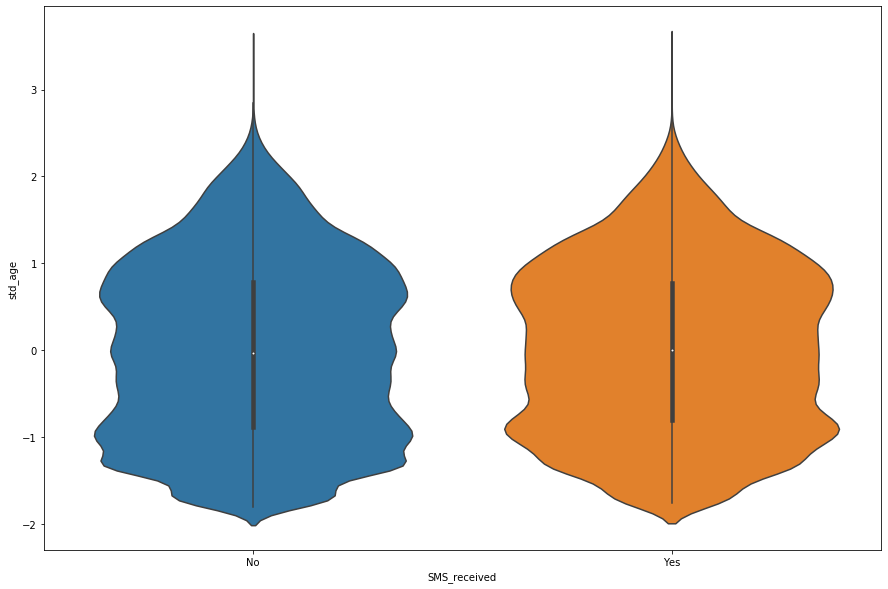

In [11]:
fig = plt.figure(figsize=(15,10))
g = sns.violinplot(x="SMS_received", y="std_age", data=appts)
g.set_xticklabels(['No', 'Yes'])
g

Somewhat suprisingly we can see that whether the patient received a text or not actually does not really impact whether they will show up to their appointment.

## Hypothesis Testing and Machine Learning

## Conclusion